<a href="https://colab.research.google.com/github/batul-hussain/Business-Case-Studies-2022/blob/main/Yulu_Business_Case_Studies/Yulu_Business_Case_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import statistics
import math
import scipy.stats as stats
from scipy.stats import f_oneway

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing.csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['bike_sharing.csv'].decode('utf-8')))

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# getting the shape of the data (mean no of rows and column)
print(f"Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}")

Number of rows: 10886 
Number of columns: 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Convert to date time dtype 
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
#No. of Total users in different season 
s1t = data[data['season']== 1]['count'].sum()
s2t = data[data['season']== 2]['count'].sum()
s3t = data[data['season']== 3]['count'].sum()
s4t = data[data['season']== 4]['count'].sum()
print ('Total users in Spring :',s1t)
print ('Total users in Summer :',s2t)
print ('Total users in Fall :',s3t)
print ('Total users in Winter :',s4t)

Total users in Spring : 312498
Total users in Summer : 588282
Total users in Fall : 640662
Total users in Winter : 544034


In [ ]:
#No of casual and registered users in different seasons
s1c = data[data['season']== 1]['casual'].sum()
s1r = data[data['season']== 1]['registered'].sum()
s2c = data[data['season']== 2]['casual'].sum()
s2r = data[data['season']== 2]['registered'].sum()
s3c = data[data['season']== 3]['casual'].sum()
s3r = data[data['season']== 3]['registered'].sum()
s4c = data[data['season']== 4]['casual'].sum()
s4r = data[data['season']== 4]['registered'].sum()
print ('No. of casual users in spring are :',s1c,'No. of Registered users in spring are :',s1r)
print ('No. of casual users in summer are :',s2c,'No. of Registered users in summer are :',s2r)
print ('No. of casual users in fall are :',s3c,'No. of Registered users in fall are :',s3r)
print ('No. of casual users in winter are :',s4c,'No. of Registered users in winter are :',s4r)

No. of casual users in spring are : 41605 No. of Registered users in spring are : 270893
No. of casual users in summer are : 129672 No. of Registered users in summer are : 458610
No. of casual users in fall are : 142718 No. of Registered users in fall are : 497944
No. of casual users in winter are : 78140 No. of Registered users in winter are : 465894


In [ ]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
#No. of Total users in Holidays
h1t = data[data['holiday']== 1]['count'].sum()
print ('Total users in Holiday :',h1t)


Total users in Holiday : 57808


In [ ]:
#No of casual and registered users in Holidays
h1c = data[data['holiday']== 1]['casual'].sum()
h1r = data[data['holiday']== 1]['registered'].sum()
print ('No. of casual users in holidays are :',h1c,'No. of Registered users in holidays are :',h1r)

No. of casual users in holidays are : 15171 No. of Registered users in holidays are : 42637


In [ ]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
#No. of Total users in Working Days
w1t = data[data['workingday']== 1]['count'].sum()
print ('Total users in Working Day :',w1t)


Total users in Working Day : 1430604


In [ ]:
#No of casual and registered users in Holidays
w1c = data[data['workingday']== 1]['casual'].sum()
w1r = data[data['workingday']== 1]['registered'].sum()
print ('No. of casual users in working days are :',w1c,'No. of Registered users in working days are :',w1r)

No. of casual users in working days are : 186098 No. of Registered users in working days are : 1244506


In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
#No. of Total users in different weathers
wr1t = data[data['weather']== 1]['count'].sum()
wr2t = data[data['weather']== 2]['count'].sum()
wr3t = data[data['weather']== 3]['count'].sum()
wr4t = data[data['weather']== 4]['count'].sum()
print ('Total users in Clear, Few clouds, partly cloudy, partly cloudy Weather :',wr1t)
print ('Total users in Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist Weather :',wr2t)
print ('Total users in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather :',wr3t)
print ('Total users in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather :',wr4t)

Total users in Clear, Few clouds, partly cloudy, partly cloudy Weather : 1476063
Total users in Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist Weather : 507160
Total users in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather : 102089
Total users in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather : 164


In [ ]:
#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

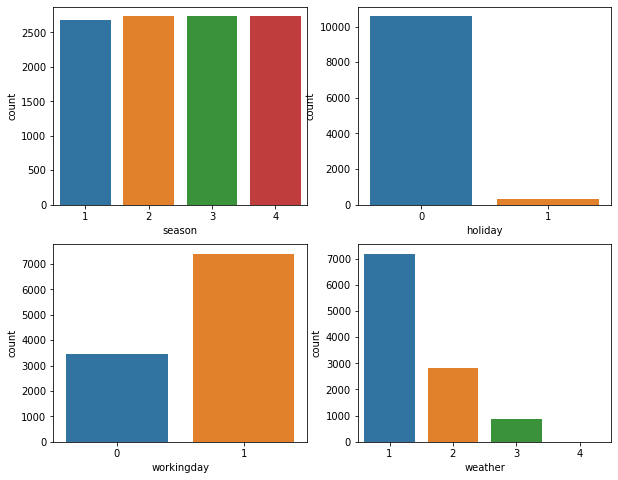

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.countplot(data['season'],ax=axis[0,0])
sns.countplot(data['holiday'],ax=axis[0,1])
sns.countplot(data['workingday'],ax=axis[1,0])
sns.countplot(data['weather'],ax=axis[1,1])

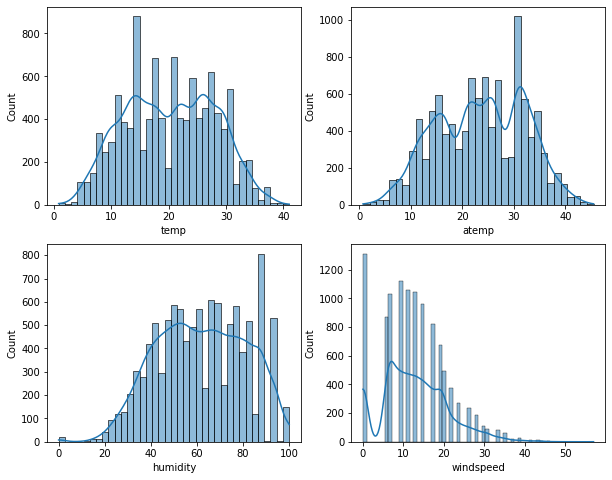

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.histplot(data=data,x='temp',kde='True',ax=axis[0,0])
sns.histplot(data=data,x='atemp',kde='True',ax=axis[0,1])
sns.histplot(data=data,x='humidity',kde='True',ax=axis[1,0])
sns.histplot(data=data,x='windspeed',kde='True',ax=axis[1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


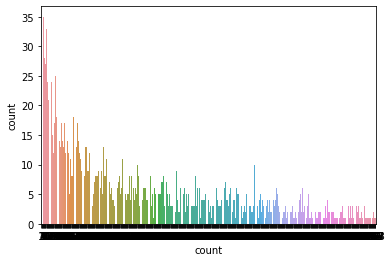

In [ ]:
sns.countplot(data[data['workingday']==0]['count'])

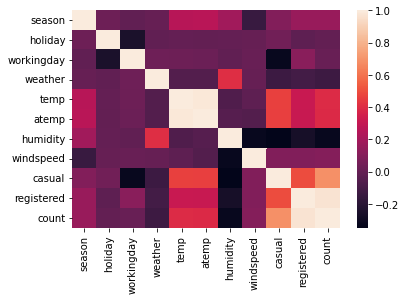

In [ ]:
sns.heatmap(data.corr())

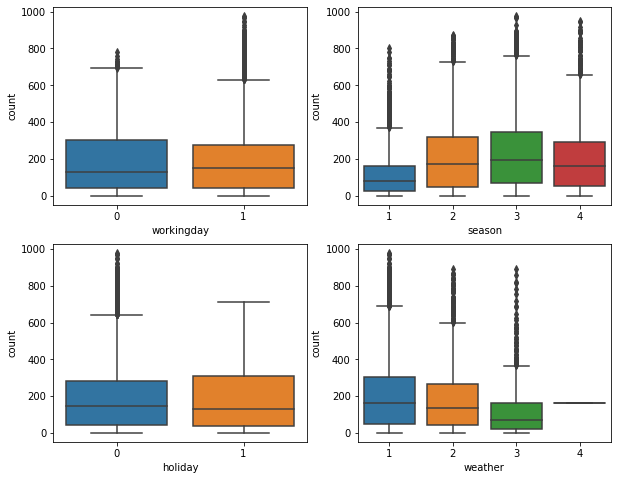

In [ ]:
#Outlier Detection using boxplot
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.boxplot(data=data,y='count',x='workingday',ax=axis[0,0])
sns.boxplot(data=data,y='count',x='season',ax=axis[0,1])
sns.boxplot(data=data,y='count',x='holiday',ax=axis[1,0])
sns.boxplot(data=data,y='count',x='weather',ax=axis[1,1])

In [ ]:
'''
2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Before conducting the two-sample T-Test we need to find 
---The two samples data groups are independent or not
---if the given data groups have the same variance. If the ratio is less than 4:1 then we can consider that the given data groups have equal variance.
---Whether the data elements in respective groups follow any normal distribution.

H0 = Working Day has no effect on the number of electric cycles rented
H1 = Working day has effect on the number of electric cycles rented
Significance level alpha = 0.05


'''

'\n2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented\n\nBefore conducting the two-sample T-Test we need to find \n---The two samples data groups are independent or not\n---if the given data groups have the same variance. If the ratio is less than 4:1 then we can consider that the given data groups have equal variance.\n---Whether the data elements in respective groups follow any normal distribution.\n\nH0 = Working Day has no effect on the number of electric cycles rented\nH1 = Working day has effect on the number of electric cycles rented\nSignificance level alpha = 0.05\n\n\n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


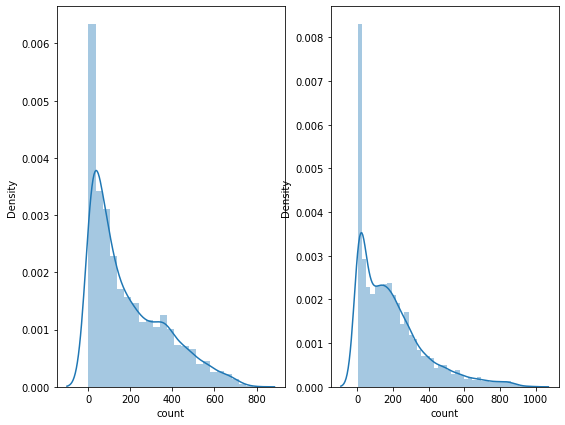

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,7))
sns.distplot(data[data['workingday']==0]['count'],ax=axis[0])
sns.distplot(data[data['workingday']==1]['count'],ax=axis[1])

In [ ]:
#Since data is not distributed normally, lets apply CLT to convert data into gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


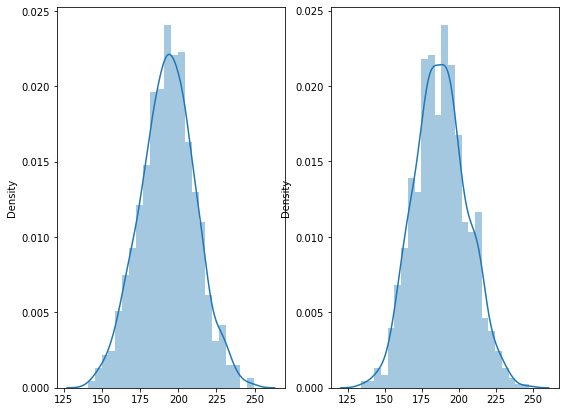

In [ ]:
def calc_sample_mean0(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_work0 = data[data['workingday']==0]['count'].sample(n=sample_size,replace=True)
    sample_work0_mean = sample_count_work0.mean()
    mean.append(sample_work0_mean)
  return mean
data_working0 = np.array(calc_sample_mean0(100,1000))
def calc_sample_mean1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_work1 = data[data['workingday']==1]['count'].sample(n=sample_size,replace=True)
    sample_work1_mean = sample_count_work1.mean()
    mean.append(sample_work1_mean)
  return mean
data_working1 = np.array(calc_sample_mean1(100,1000))

fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,7))
sns.distplot(data_working1,ax=axis[0])
sns.distplot(data_working0,ax=axis[1])

In [ ]:
#Chevking if data groups has equal variance
print(data_working1.var()/data_working0.var())

1.0129754198558871


In [ ]:
stats.ttest_ind(a=data_working0, b=data_working1, equal_var=True)
#Here, since the p-value is less than alpha = 0.05 so we reject the null hypothesis of the test. We have sufficient evidence to say that Working day has effect on the number of electric cycles rented

Ttest_indResult(statistic=-6.594771568301287, pvalue=5.4358322960319895e-11)

In [ ]:
'''
ANNOVA Test to determine - No. of cycles rented are similar or different in different weather
To conduct the ANNOVA test sample data should comply : 
---Each observation is independent of any other observation 
---Values in each sampled groups to be drawn from normally distributed populations
---Homogeneity of variance : If the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled

H0 : No. of cycles rented are similar in different weathers i.e mu_w1 = mu_w2 = mu_w3 = mu_w4
H1 : No. of Cycles rented are not similar for atleast one weather

Significence Level Alpha : 0.05

'''



'\nANNOVA Test to determine - No. of cycles rented are similar or different in different weather\nTo conduct the ANNOVA test sample data should comply : \n---Each observation is independent of any other observation \n---Values in each sampled groups to be drawn from normally distributed populations\n---Homogeneity of variance : If the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled\n\nH0 : No. of cycles rented are similar in different weathers i.e mu_w1 = mu_w2 = mu_w3 = mu_w4\nH1 : No. of Cycles rented are not similar for atleast one weather\n\nSignificence Level Alpha : 0.05\n\n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

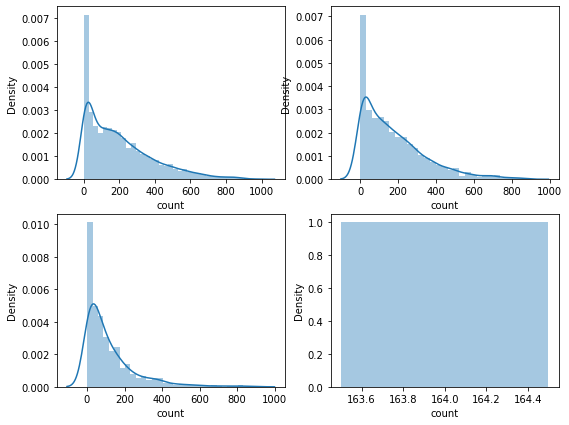

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (9,7))
sns.distplot(data[data['weather']==1]['count'],ax=axis[0,0])
sns.distplot(data[data['weather']==2]['count'],ax=axis[0,1])
sns.distplot(data[data['weather']==3]['count'],ax=axis[1,0])
sns.distplot(data[data['weather']==4]['count'],ax=axis[1,1])

In [ ]:
#Since data is not distributed normally, lets apply CLT to convert data into gaussian distribution

In [ ]:
def calc_sample_mean_w1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_w1 = data[data['weather']==1]['count'].sample(n=sample_size,replace='True')
    sample_w1_mean = sample_count_w1.mean()
    mean.append(sample_w1_mean)
  return mean
data_weather_1 = calc_sample_mean_w1(100,1000)
def calc_sample_mean_w2(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_w2 = data[data['weather']==2]['count'].sample(n=sample_size,replace='True')
    sample_w2_mean = sample_count_w2.mean()
    mean.append(sample_w2_mean)
  return mean
data_weather_2 = calc_sample_mean_w2(100,1000)
def calc_sample_mean_w3(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_w3 = data[data['weather']==3]['count'].sample(n=sample_size,replace='True')
    sample_w3_mean = sample_count_w3.mean()
    mean.append(sample_w3_mean)
  return mean
data_weather_3 = calc_sample_mean_w3(100,1000)
def calc_sample_mean_w4(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_w4 = data[data['weather']==4]['count'].sample(n=sample_size,replace='True')
    sample_w4_mean = sample_count_w4.mean()
    mean.append(sample_w4_mean)
  return mean
data_weather_4 = calc_sample_mean_w4(100,1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

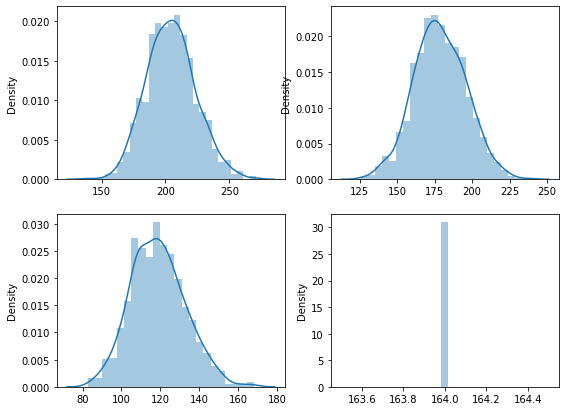

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (9,7))
sns.distplot(data_weather_1,ax=axis[0,0])
sns.distplot(data_weather_2,ax=axis[0,1])
sns.distplot(data_weather_3,ax=axis[1,0])
sns.distplot(data_weather_4,ax=axis[1,1])

In [ ]:
'''Since the p-value is less than 0.05 hence we would reject the null hypothesis. 
This implies that we have sufficient proof to say that there exists a difference in the no. of cycle rented in different weather. 
'''
f_oneway(data_weather_1, data_weather_2, data_weather_3, data_weather_4)

F_onewayResult(statistic=5922.891559501811, pvalue=0.0)

In [ ]:
'''
ANNOVA Test to determine weather No. of cycles rented are similar or different in different seasons
To conduct the ANNOVA test sample data should comply : 
---Each observation is independent of any other observation 
---Values in each sampled groups to be drawn from normally distributed populations
---Homogeneity of variance : If the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled

H0 : No. of cycles rented are similar in different seasons i.e mu_s1 = mu_s2 = mu_s3 = mu_s4
H1 : No. of Cycles rented are not similar for atleast one season

Significence Level Alpha : 0.05

'''


'\nANNOVA Test to determine weather No. of cycles rented are similar or different in different seasons\nTo conduct the ANNOVA test sample data should comply : \n---Each observation is independent of any other observation \n---Values in each sampled groups to be drawn from normally distributed populations\n---Homogeneity of variance : If the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled\n\nH0 : No. of cycles rented are similar in different seasons i.e mu_s1 = mu_s2 = mu_s3 = mu_s4\nH1 : No. of Cycles rented are not similar for atleast one season\n\nSignificence Level Alpha : 0.05\n\n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

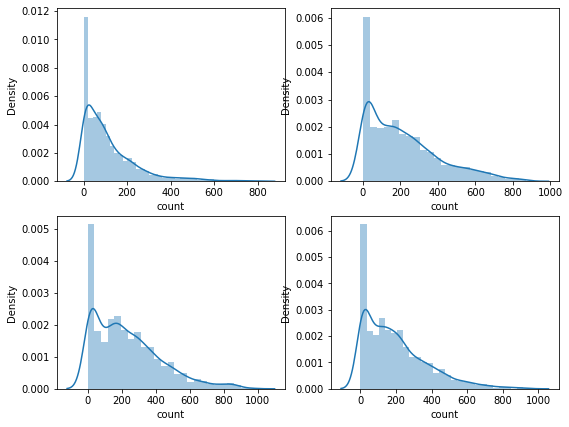

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (9,7))
sns.distplot(data[data['season']==1]['count'],ax=axis[0,0])
sns.distplot(data[data['season']==2]['count'],ax=axis[0,1])
sns.distplot(data[data['season']==3]['count'],ax=axis[1,0])
sns.distplot(data[data['season']==4]['count'],ax=axis[1,1])

In [ ]:
#Since data is not distributed normally, lets apply CLT to convert data into gaussian distribution

In [ ]:
def calc_sample_mean_s1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_s1 = data[data['season']==1]['count'].sample(n=sample_size,replace='True')
    sample_s1_mean = sample_count_s1.mean()
    mean.append(sample_s1_mean)
  return mean
data_season_1 = calc_sample_mean_s1(100,1000)
def calc_sample_mean_s2(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_s2 = data[data['season']==2]['count'].sample(n=sample_size,replace='True')
    sample_s2_mean = sample_count_s2.mean()
    mean.append(sample_s2_mean)
  return mean
data_season_2 = calc_sample_mean_s2(100,1000)
def calc_sample_mean_s3(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_s3 = data[data['season']==3]['count'].sample(n=sample_size,replace='True')
    sample_s3_mean = sample_count_s3.mean()
    mean.append(sample_s3_mean)
  return mean
data_season_3 = calc_sample_mean_s3(100,1000)
def calc_sample_mean_s4(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_count_s4 = data[data['season']==4]['count'].sample(n=sample_size,replace='True')
    sample_s4_mean = sample_count_s4.mean()
    mean.append(sample_s4_mean)
  return mean
data_season_4 = calc_sample_mean_s4(100,1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

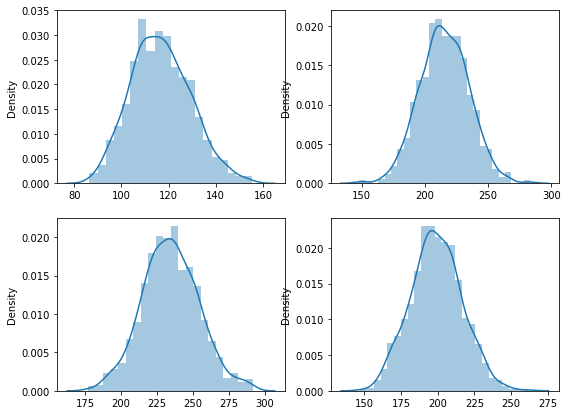

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (9,7))
sns.distplot(data_season_1,ax=axis[0,0])
sns.distplot(data_season_2,ax=axis[0,1])
sns.distplot(data_season_3,ax=axis[1,0])
sns.distplot(data_season_4,ax=axis[1,1])

In [ ]:
'''Since the p-value is less than 0.05 hence we would reject the null hypothesis. 
This implies that we have sufficient proof to say that there exists a difference in the no. of cycle rented in different seasons. 
'''
f_oneway(data_season_1, data_season_2, data_season_3, data_season_4)

F_onewayResult(statistic=8808.492105992002, pvalue=0.0)

In [ ]:
'''
Chi-square test to check if Weather is dependent on the season 

Below stated holds true for data, thus we can carry out Chi-square test
--Both variables are categorical
--All observations are independent
--Cells in the contingency table are mutually exclusive.
--Expected value of cells should be 5 or greater in at least 80% of cells.

H0 : There is no relation between the variables weather and season. 
H1 : There is a significant relation between the two.

d.o.f = (4-1)*(4-1) = 9
alpha = 0.05
''' 


'\nChi-square test to check if Weather is dependent on the season \n\nBelow stated holds true for data, thus we can carry out Chi-square test\n--Both variables are categorical\n--All observations are independent\n--Cells in the contingency table are mutually exclusive.\n--Expected value of cells should be 5 or greater in at least 80% of cells.\n\nH0 : There is no relation between the variables weather and season. \nH1 : An alternate hypothesis would state that there is a significant relation between the two.\n'

In [ ]:
# creating contingency table
data_crosstab = pd.crosstab(data['season'],
                            data['weather'],
                           margins=True, margins_name="Total")
data_crosstab

weather,1,2,3,4,Total
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
Total,7192,2834,859,1,10886


In [ ]:
# Calcualtion of Chisquare
chi_square = 0
rows = data['season'].unique()
columns = data['weather'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E
chi_square

49.15865559689362

In [ ]:
#Calculation of Critical Value
critical_value = stats.chi2.ppf(1-0.05, (len(rows)-1)*(len(columns)-1))
critical_value

16.918977604620448

In [ ]:
# Since chi_square > critical_value , 
# Conclusion: We have enough evidence that there is an association between season and weather, at 5% significance level.
